In [7]:
from model import build_model
from config import Dataset, ClassicalModel, Embedder, Pooling, gen_args
from train import get_flops
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import ShuffleSplit
from fvcore.nn import FlopCountAnalysis
import torch
from test import count_parameters

from dataset import get_dataset

In [9]:
args = gen_args(
    Dataset.PROTEINS,
    Embedder.NONE,
    ClassicalModel.GCN,
    Pooling.MEAN,
    
)

In [3]:
train_ds, test_ds = get_dataset(args)

In [10]:
model = build_model(args, 4, 2)

In [11]:
count_parameters(model)

25410

In [5]:
type(model.embedder)

model.QFE

In [17]:
case = test_ds[0]
x = case.x
edge_index = case.edge_index
batch = case.batch
device = "cpu"

In [29]:
args.embedder = Embedder.NONE
model = build_model(args, 4, 2)

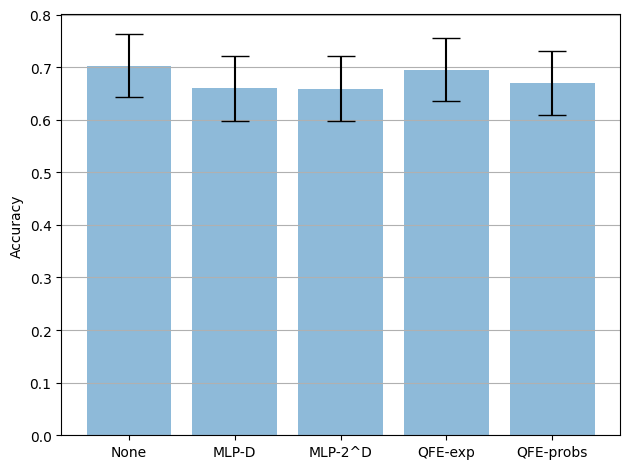

In [13]:
import matplotlib.pyplot as plt

embedders = ["None", "MLP-D", "MLP-2^D", "QFE-exp", "QFE-probs"]
averages = [0.703, 0.660, 0.659, 0.695, 0.669]
error = [0.059, 0.062, 0.062, 0.060, 0.061] 

x_pos = range(len(embedders))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, averages, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(embedders)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

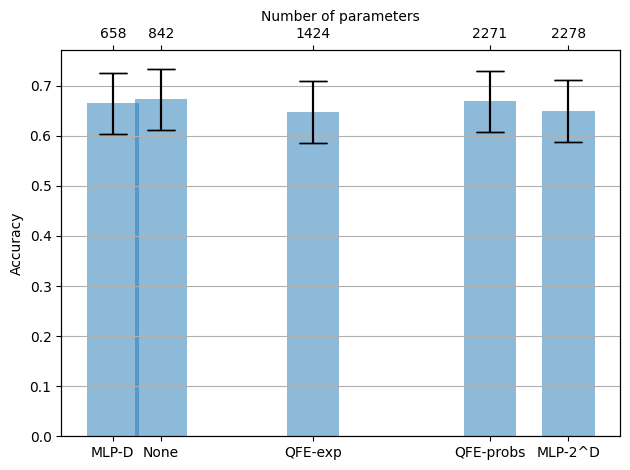

In [37]:
averages = [0.673, 0.665, 0.649, 0.648, 0.669]
error = [0.061, 0.061, 0.062, 0.062, 0.061]
param_counts = [842, 658, 2278, 1424, 2271]
param_counts_mod = [842, 658, 2400, 1424, 2100]

# Build the plot
fig, ax = plt.subplots()
ax.bar(param_counts_mod, averages, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=200)
ax.set_ylabel('Accuracy')
ax.set_xticks(param_counts_mod)
ax.set_xticklabels(embedders)
ax.yaxis.grid(True)

axT = ax.twiny()
axT.bar(param_counts_mod, averages, yerr=error, align='center', alpha=0.0, ecolor='black', capsize=10, width=200)

axT.set_xticks(param_counts_mod)
axT.set_xticklabels(param_counts)
axT.set_xlabel('Number of parameters')

# ax.annotate('QFE-exp', (param_counts_mod[3], averages[3]), textcoords="offset points", xytext=(-25,10), ha='center')

# Save the figure and show
plt.tight_layout()
plt.show()